In [15]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()
os.chdir("D:/YEAR 3/Semester 1/FIT3163")

calender = pd.read_csv("calendar.csv")
validation = pd.read_csv("sales_train_validation.csv")
evaluation = pd.read_csv("sales_train_evaluation.csv")
price = pd.read_csv("sell_prices.csv")


In [16]:
evaluation['cat_id'].unique()

calender['date'] = pd.to_datetime(calender['date'])

In [17]:
price.shape
max_price = price['sell_price'].max()
min_price = price['sell_price'].min()
price.describe()
price.sort_values('sell_price')
max_index = price['sell_price'].idxmax()
min_index = price['sell_price'].idxmin()
max_store = price.loc[max_index, 'store_id']
min_store = price.loc[min_index, 'store_id']
max_item = price.loc[max_index, 'item_id']
min_item = price.loc[min_index, 'item_id']
price.loc[max_index, 'wm_yr_wk']
price.loc[min_index, 'wm_yr_wk']

11442

In [18]:
max_store_character = str(max_store)
min_store_character = str(min_store)
print("The highest price in the data is: USD", max_price, "at", max_store_character)
print("The lowest price in the data is: USD", min_price, "at", min_store_character)

The highest price in the data is: USD 107.32 at WI_3
The lowest price in the data is: USD 0.01 at CA_1


In [19]:
hobbies = evaluation[evaluation['cat_id'] == "HOBBIES"]
household = evaluation[evaluation['cat_id'] == "HOUSEHOLD"]
foods = evaluation[evaluation['cat_id'] == "FOODS"]


In [20]:

hobbies['sum_unit_sold'] = hobbies.iloc[:, 7:1947].sum(axis=1)
household['sum_unit_sold'] = household.iloc[:, 7:1947].sum(axis=1)
foods['sum_unit_sold'] = foods.iloc[:, 7:1947].sum(axis=1)


C:\Users\hp\AppData\Local\Temp\ipykernel_26864\1876086217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies['sum_unit_sold'] = hobbies.iloc[:, 7:1947].sum(axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_26864\1876086217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household['sum_unit_sold'] = household.iloc[:, 7:1947].sum(axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_26864\1876086217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [21]:
hobbies_price = price[price.apply(lambda row: 'HOBBIES' in ','.join(row.values.astype(str)), axis=1)]
household_price = price[price.apply(lambda row: 'HOUSEHOLD' in ','.join(row.values.astype(str)), axis=1)]
foods_price = price[price.apply(lambda row: 'FOODS' in ','.join(row.values.astype(str)), axis=1)]


In [22]:
hobbies.shape
household.shape
foods.shape
hobbies_price.shape
household_price.shape
foods_price.shape


(3181789, 4)

In [23]:
hobbies_clean = hobbies.drop_duplicates()
hobbies_clean = hobbies_clean.dropna()
household_clean = household.drop_duplicates()
household_clean = household_clean.dropna()
foods_clean = foods.drop_duplicates()
foods_clean = foods_clean.dropna()
hobbies_price_clean = hobbies_price.drop_duplicates()
hobbies_price_clean = hobbies_price_clean.dropna()
household_price_clean = household_price.drop_duplicates()
household_price_clean = household_price_clean.dropna()
foods_price_clean = foods_price.drop_duplicates()
foods_price_clean = foods_price_clean.dropna()

In [24]:
hobbies_clean.shape
household_clean.shape
foods_clean.shape
hobbies_price_clean.shape
household_price_clean.shape
foods_price_clean.shape

(3181789, 4)

In [25]:
ttest_ind(hobbies_price['sell_price'], household_price['sell_price'])
ttest_ind(hobbies_price['sell_price'], foods_price['sell_price'])
ttest_ind(household_price['sell_price'], foods_price['sell_price'])

ttest_ind(hobbies['sum_unit_sold'], household['sum_unit_sold'])
ttest_ind(hobbies['sum_unit_sold'], foods['sum_unit_sold'])
ttest_ind(household['sum_unit_sold'], foods['sum_unit_sold'])


Ttest_indResult(statistic=-24.44246864317065, pvalue=2.1022064278019526e-130)

In [26]:

# hobbies_list = hobbies_price['item_id'].unique()
# for i in hobbies_list:
#     print("Mean", i, "=", hobbies_price[hobbies_price['item_id'] == i]['sell_price'].mean())

# np.random.seed(3164)

# n = 5000


In [27]:
np.random.seed(3164)
sampled_hobbies = hobbies.sample(n)
sampled_household = household.sample(n)
sampled_foods = foods.sample(n, replace=False)

NameError: name 'n' is not defined

In [ ]:
hobbies_merge = pd.merge(hobbies_price, calender, on="wm_yr_wk")
household_merge = pd.merge(household_price, calender, on="wm_yr_wk")
foods_merge = pd.merge(foods_price, calender, on="wm_yr_wk")
m = 5000

In [ ]:
np.random.seed(3164)
hobbies_merge_sampling = hobbies_merge.sample(m, replace=False)

household_merge_sampling = household_merge.sample(m, replace=False)

foods_merge_sampling = foods_merge.sample(m, replace=False)
hobbies_merge = pd.merge(sampled_hobbies, hobbies_merge_sampling, on="item_id")
household_merge = pd.merge(sampled_household, household_merge_sampling, on="item_id")
foods_merge = pd.merge(sampled_foods, foods_merge_sampling, on="item_id")
x = np.arange(min(hobbies_merge["sell_price"]), max(hobbies_merge["sell_price"]), 1)
y = hobbies_merge["sum_unit_sold"]

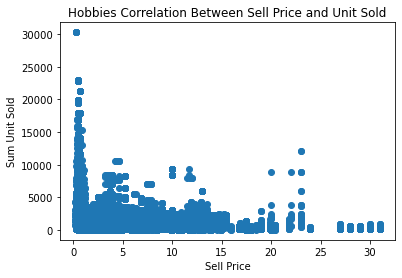

In [ ]:
plt.scatter(hobbies_merge["sell_price"], hobbies_merge["sum_unit_sold"])
plt.title("Hobbies Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

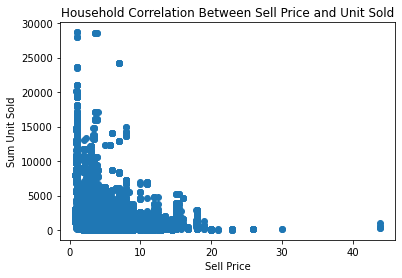

In [ ]:


plt.scatter(household_merge["sell_price"], household_merge["sum_unit_sold"])
plt.title("Household Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

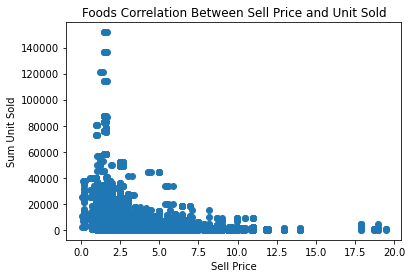

In [ ]:
plt.scatter(foods_merge["sell_price"], foods_merge["sum_unit_sold"])
plt.title("Foods Correlation Between Sell Price and Unit Sold")
plt.xlabel("Sell Price")
plt.ylabel("Sum Unit Sold")
plt.show()

In [ ]:


hobbies_total_sales = hobbies_merge["sum_unit_sold"] * hobbies_merge["sell_price"]
hobbies_merge["sales"] = hobbies_total_sales
household_total_sales = household_merge["sum_unit_sold"] * household_merge["sell_price"]
household_merge["sales"] = household_total_sales
foods_total_sales = foods_merge["sum_unit_sold"] * foods_merge["sell_price"]
foods_merge["sales"] = foods_total_sales

hobbies_viz = hobbies_merge[["id","state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date"]]
household_viz = household_merge[["id","state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date"]]
foods_viz = foods_merge[["id","state_id", "dept_id", "cat_id", "sell_price", "sales", "sum_unit_sold", "date"]]
my_data = pd.concat([hobbies_viz, household_viz, foods_viz])
my_data.columns = ["id","state_id", "dept_id", "cat_id", "sell_price", "revenue", "sales_volume", "date"]



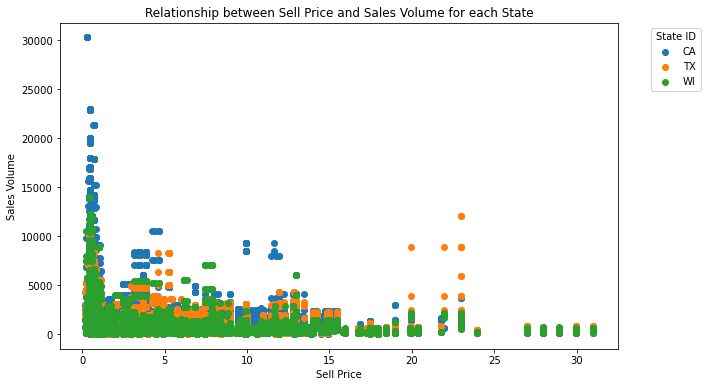

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for states
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map state_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(hobbies_merge['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in hobbies_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




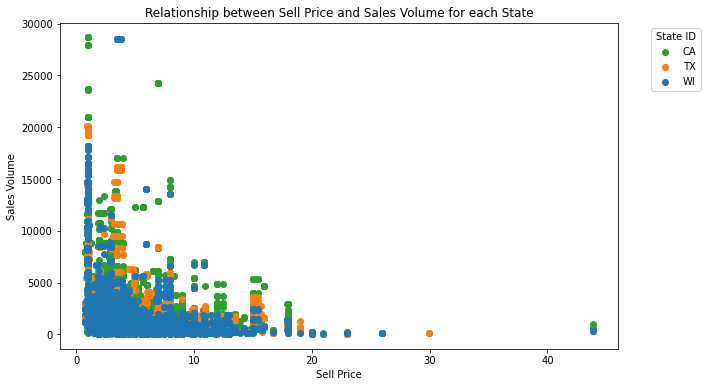

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for states
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map state_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(household_merge['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in household_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


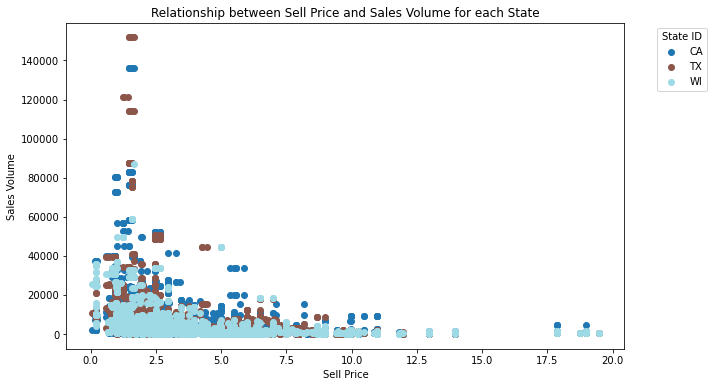

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique state_ids and assign a color to each
state_ids = foods_merge['state_id'].unique()
num_states = len(state_ids)
colors = plt.cm.get_cmap('tab20', num_states)

# Map state_id to color
state_color_map = {state_id: colors(i) for i, state_id in enumerate(state_ids)}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in foods_merge.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=state_id, color=state_color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='State ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


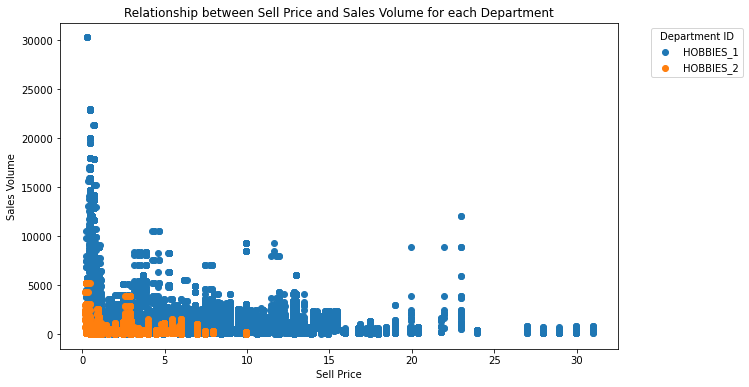

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(hobbies_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in hobbies_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


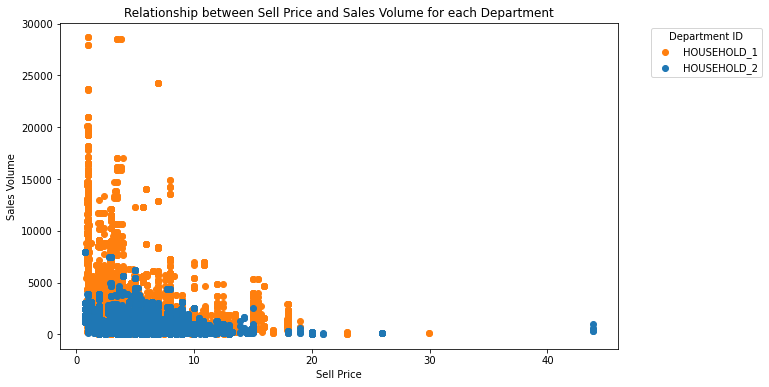

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(household_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in household_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



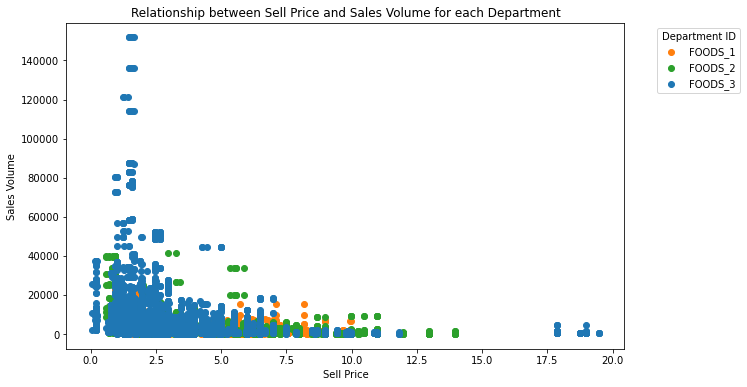

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(foods_merge['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in foods_merge.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sum_unit_sold'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


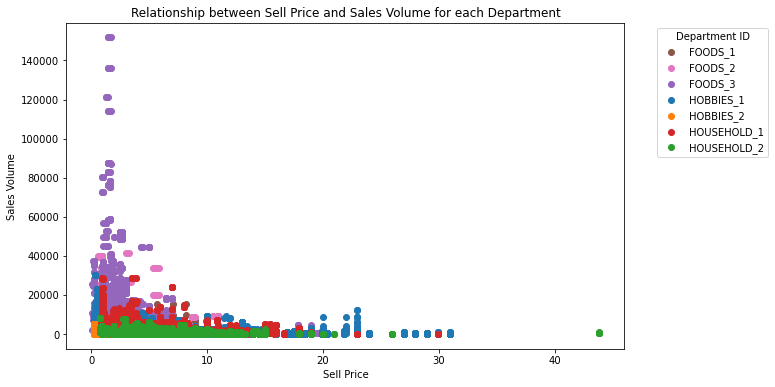

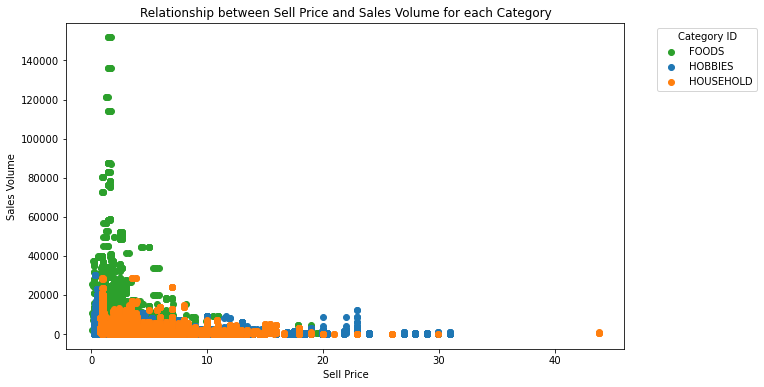

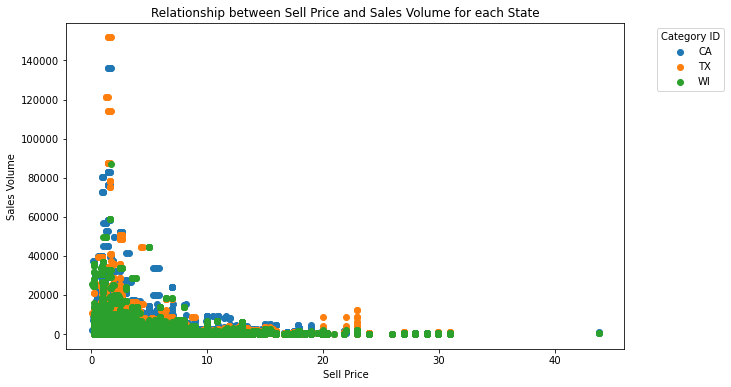

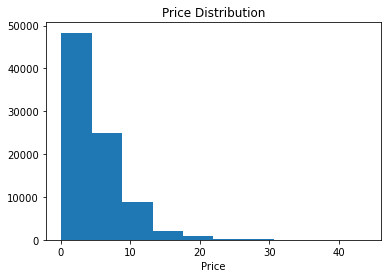

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(my_data['dept_id'].unique())}

# Create a scatter plot with different colors for each department
plt.figure(figsize=(10, 6))
for dept_id, group in my_data.groupby('dept_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=dept_id, color=color_map[dept_id])

plt.title("Relationship between Sell Price and Sales Volume for each Department")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Define a list of colors for category
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map cat_id to colors
color_map = {cat_id: colors[i % len(colors)] for i, cat_id in enumerate(my_data['cat_id'].unique())}

# Create a scatter plot with different colors for each category
plt.figure(figsize=(10, 6))
for cat_id, group in my_data.groupby('cat_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=cat_id, color=color_map[cat_id])

plt.title("Relationship between Sell Price and Sales Volume for each Category")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Define a list of colors for state
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map cat_id to colors
color_map = {state_id: colors[i % len(colors)] for i, state_id in enumerate(my_data['state_id'].unique())}

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
for state_id, group in my_data.groupby('state_id'):
    plt.scatter(group['sell_price'], group['sales_volume'], label=state_id, color=color_map[state_id])

plt.title("Relationship between Sell Price and Sales Volume for each State")
plt.xlabel("Sell Price")
plt.ylabel("Sales Volume")
plt.legend(title='Category ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Summary statistics of my_data
my_data.describe()

# Histogram of Price Distribution
plt.hist(my_data['sell_price'])
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show()



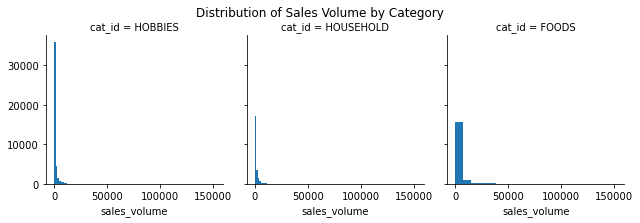

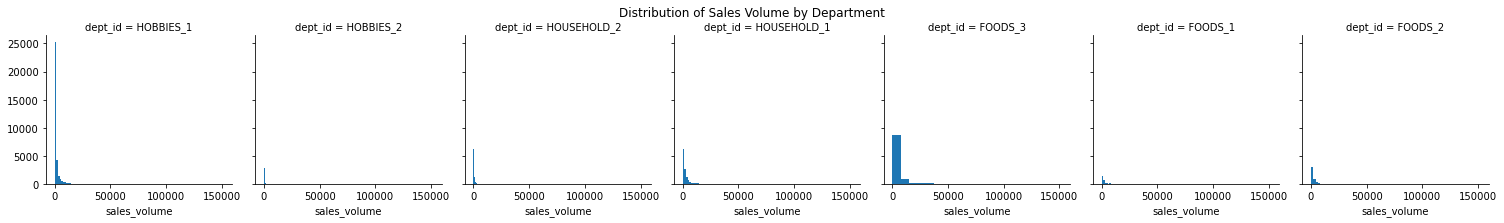

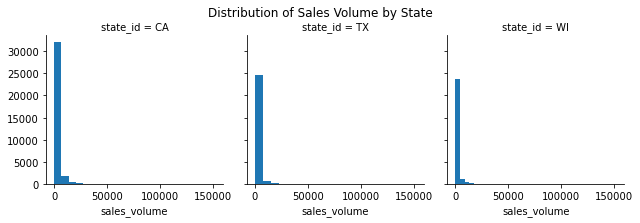

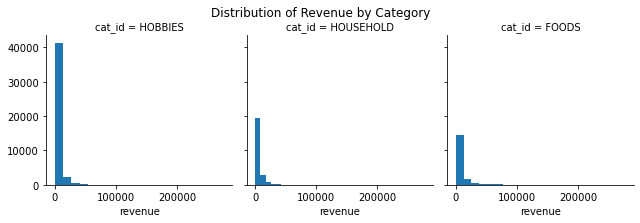

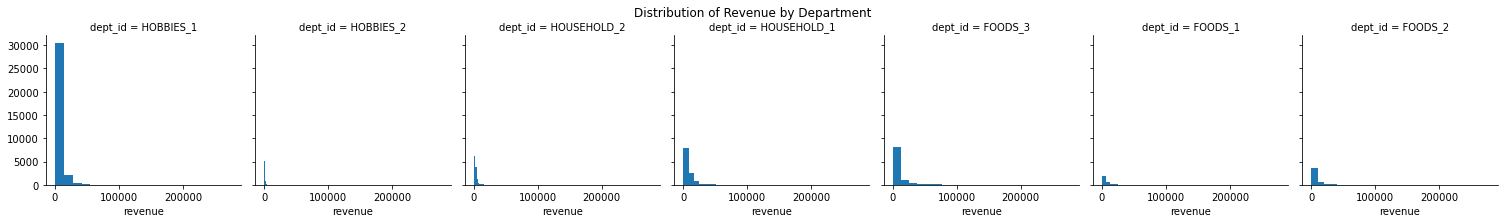

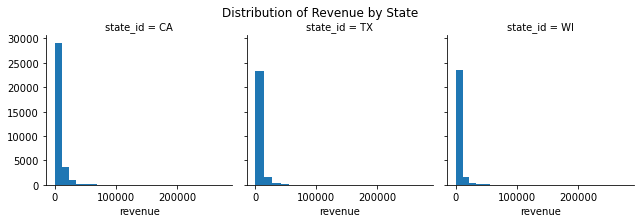

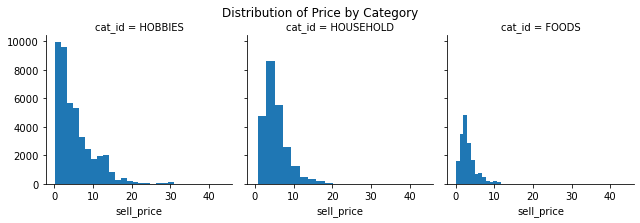

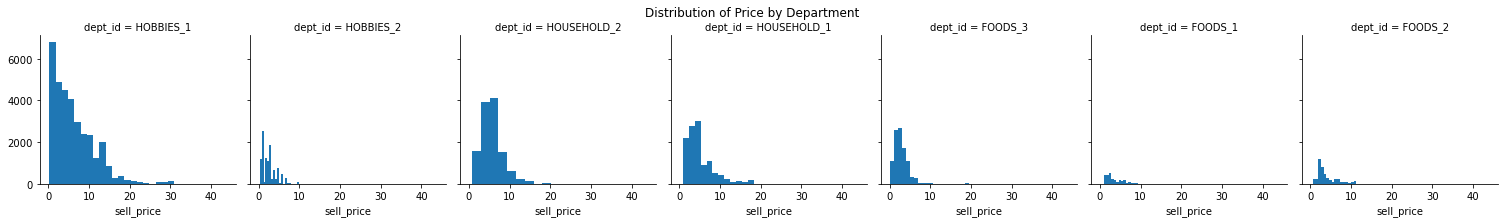

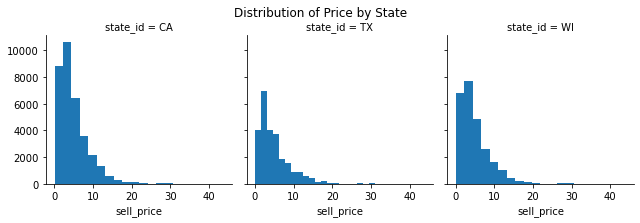

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sales Volume by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by Category", y=1.02)

# Distribution of Sales Volume by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by Department", y=1.02)

# Distribution of Sales Volume by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "sales_volume", bins=20)
g.fig.suptitle("Distribution of Sales Volume by State", y=1.02)

# Distribution of Revenue by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by Category", y=1.02)

# Distribution of Revenue by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by Department", y=1.02)

# Distribution of Revenue by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "revenue", bins=20)
g.fig.suptitle("Distribution of Revenue by State", y=1.02)

# Distribution of Price by Category
g = sns.FacetGrid(my_data, col="cat_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by Category", y=1.02)

# Distribution of Price by Department
g = sns.FacetGrid(my_data, col="dept_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by Department", y=1.02)

# Distribution of Price by State
g = sns.FacetGrid(my_data, col="state_id")
g.map(plt.hist, "sell_price", bins=20)
g.fig.suptitle("Distribution of Price by State", y=1.02)

plt.show()


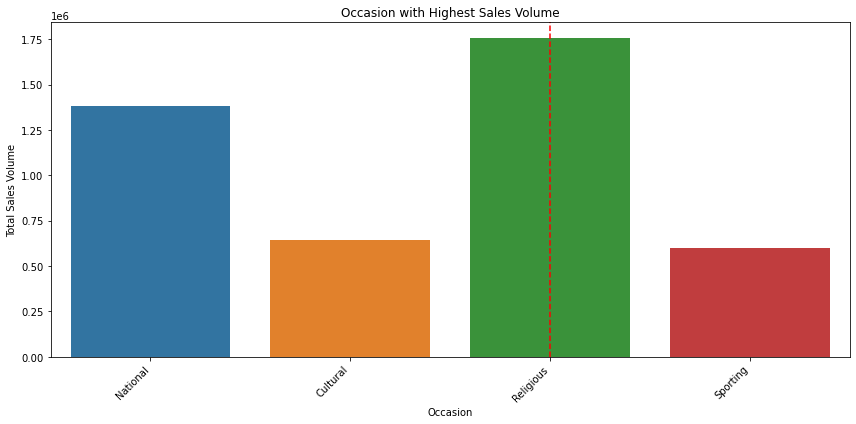

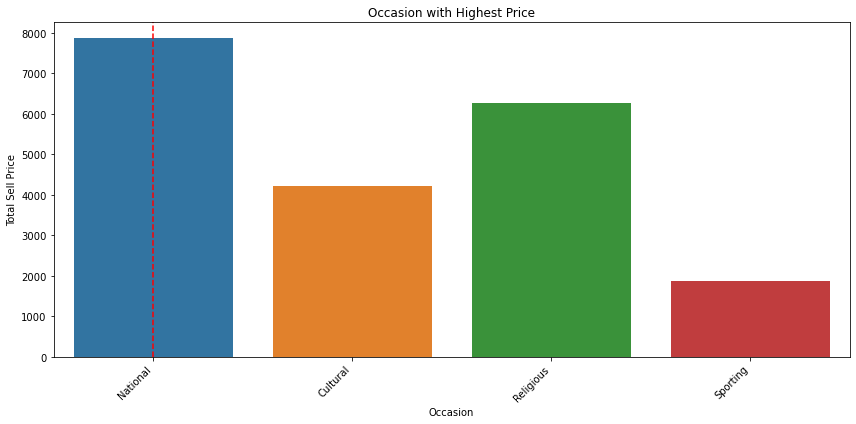

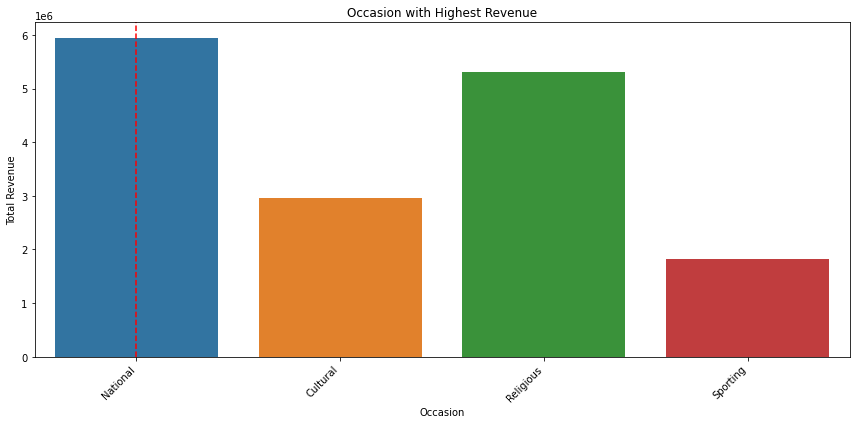

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hobbies_merge is a pandas DataFrame
max_occasion_hobbies = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sum_unit_sold', data=hobbies_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Sales Volume')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')

# Find the index of the occasion with the highest sales volume
max_occasion_index = hobbies_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_hobbies)

# Add a vertical line for the occasion with the highest sales volume
plt.axvline(x=max_occasion_index, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Assuming hobbies_merge is a pandas DataFrame
max_occasion_price_hobbies = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sell_price', data=hobbies_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Price')
plt.xlabel('Occasion')
plt.ylabel('Total Sell Price')

max_occasion_index_price = hobbies_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_price_hobbies)

# Add a vertical line for the occasion with the highest price
plt.axvline(x=max_occasion_index_price, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find occasion with highest revenue
max_occasion_revenue_hobbies = hobbies_merge[hobbies_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sales', data=hobbies_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Revenue')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')

max_occasion_index_revenue = hobbies_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_revenue_hobbies)

# Add a vertical line for the occasion with the highest revenue
plt.axvline(x=max_occasion_index_revenue, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
max_occasion_revenue_hobbies

'National'

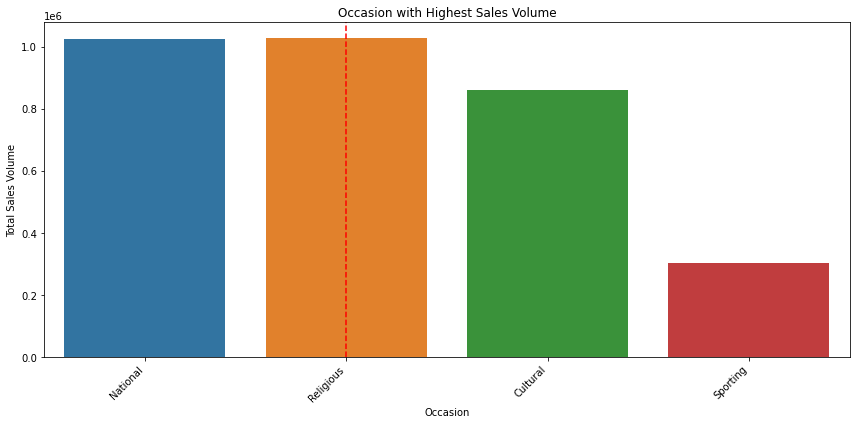

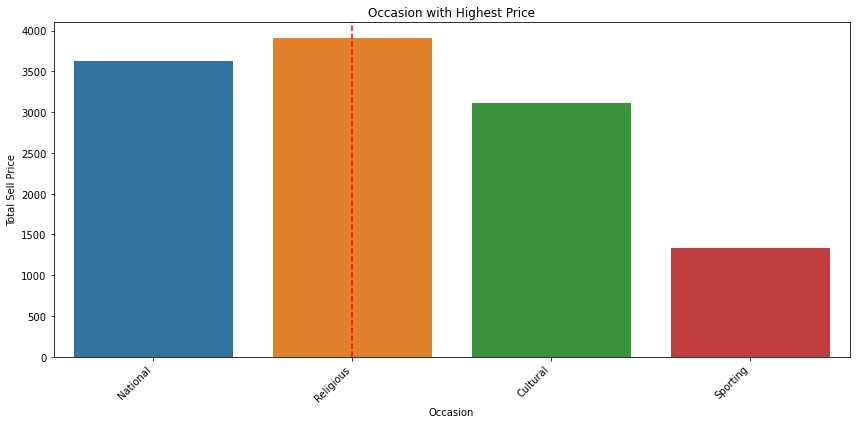

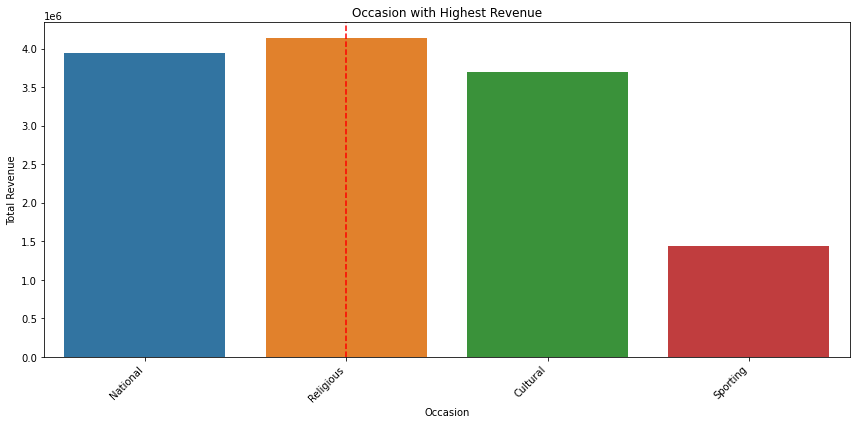

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

max_occasion_household = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sum_unit_sold', data=household_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Sales Volume')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')

max_occasion_index_household = household_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_household)

# Add a vertical line for the occasion with the highest sales volume
plt.axvline(x=max_occasion_index_household, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

max_occasion_price_household = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sell_price', data=household_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Price')
plt.xlabel('Occasion')
plt.ylabel('Total Sell Price')

max_occasion_index_price = household_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_price_household)

# Add a vertical line for the occasion with the highest price
plt.axvline(x=max_occasion_index_price, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find occasion with highest revenue
max_occasion_revenue_household = household_merge[household_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sales', data=household_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Revenue')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')

max_occasion_index_revenue = household_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_revenue_household)


# Add a vertical line for the occasion with the highest revenue
plt.axvline(x=max_occasion_index_revenue, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

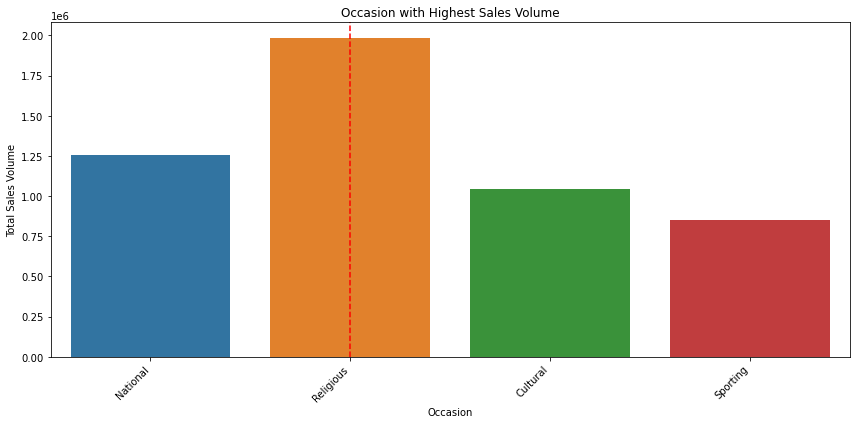

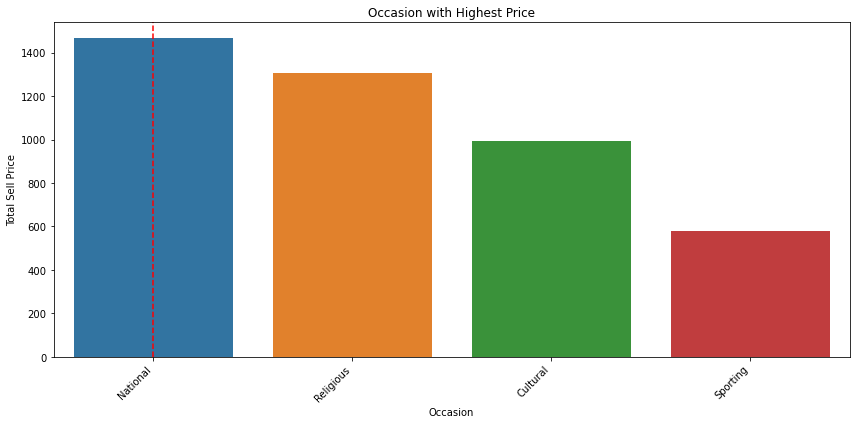

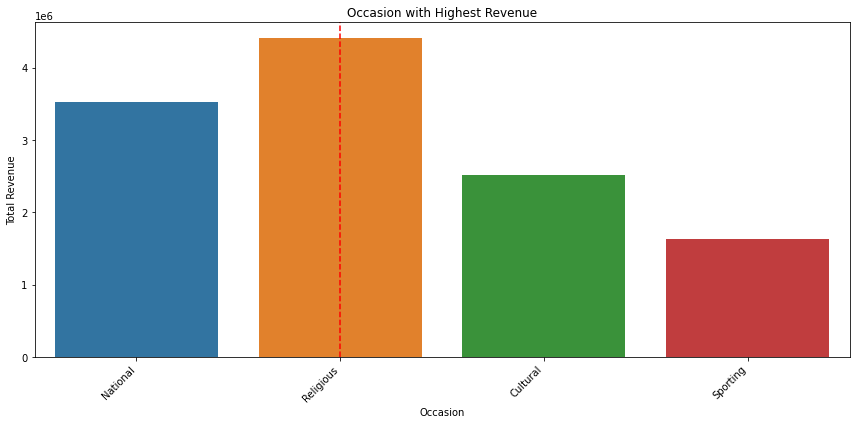

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hobbies_merge is a pandas DataFrame
max_occasion_foods = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sum_unit_sold'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sum_unit_sold', data=foods_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Sales Volume')
plt.xlabel('Occasion')
plt.ylabel('Total Sales Volume')

max_occasion_index_foods = foods_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_foods)

# Add a vertical line for the occasion with the highest sales volume
plt.axvline(x=max_occasion_index_foods, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hobbies_merge is a pandas DataFrame
max_occasion_price_foods = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sell_price'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sell_price', data=foods_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Price')
plt.xlabel('Occasion')
plt.ylabel('Total Sell Price')

max_occasion_index_price = foods_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_price_foods)

# Add a vertical line for the occasion with the highest price
plt.axvline(x=max_occasion_index_price, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Find occasion with highest revenue
max_occasion_revenue_foods = foods_merge[foods_merge['event_type_1'].str.strip() != ''].groupby('event_type_1')['sales'].sum().idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x='event_type_1', y='sales', data=foods_merge, estimator=sum, ci=None)
plt.title('Occasion with Highest Revenue')
plt.xlabel('Occasion')
plt.ylabel('Total Revenue')

max_occasion_index_revenue = foods_merge['event_type_1'].dropna().unique().tolist().index(max_occasion_revenue_foods)

# Add a vertical line for the occasion with the highest revenue
plt.axvline(x=max_occasion_index_revenue, linestyle='dashed', color='red')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

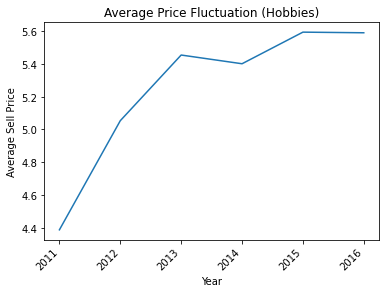

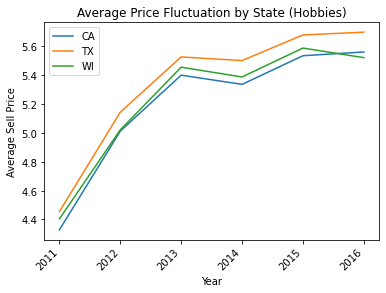

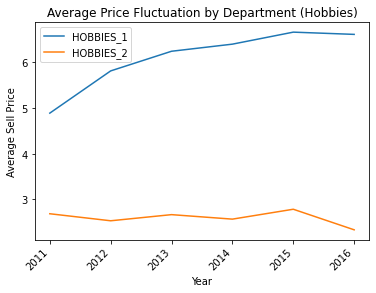

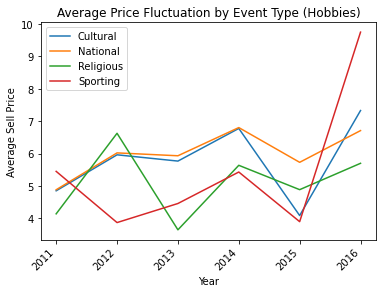

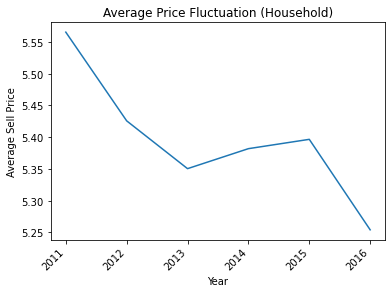

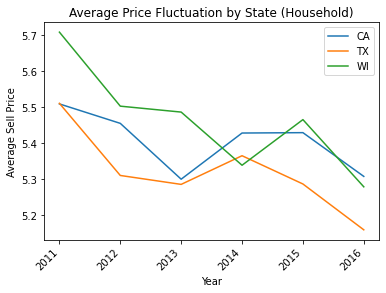

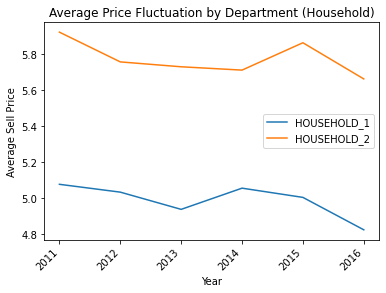

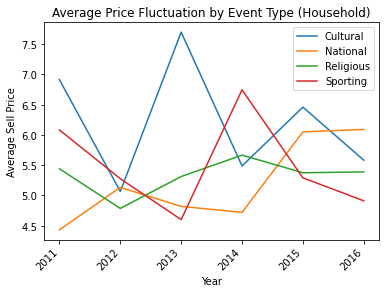

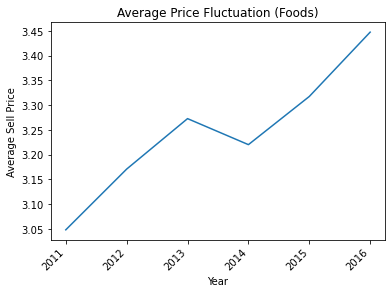

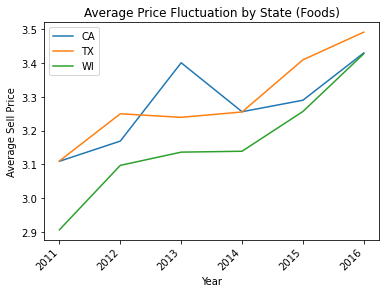

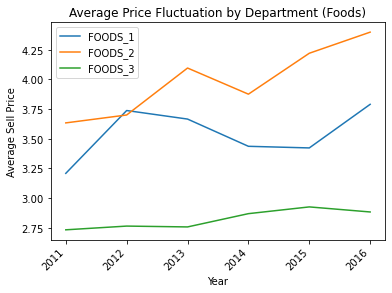

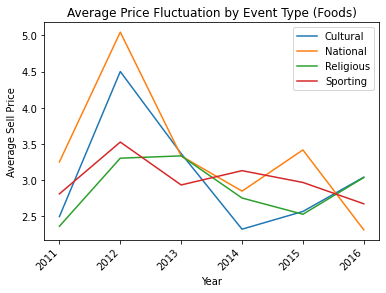

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# average_prices (hobbies_merge)
average_prices = hobbies_merge.groupby('year')['sell_price'].mean().reset_index()

plt.figure()
plt.plot(average_prices['year'], average_prices['sell_price'])
plt.title('Average Price Fluctuation (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# average_prices (hobbies_merge) by state_id
average_prices = hobbies_merge.groupby(['state_id', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for state_id in average_prices['state_id'].unique():
    plt.plot(average_prices[average_prices['state_id'] == state_id]['year'], average_prices[average_prices['state_id'] == state_id]['sell_price'], label=state_id)
plt.title('Average Price Fluctuation by State (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# average_prices (hobbies_merge) by dept_id
average_prices = hobbies_merge.groupby(['dept_id', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for dept_id in average_prices['dept_id'].unique():
    plt.plot(average_prices[average_prices['dept_id'] == dept_id]['year'], average_prices[average_prices['dept_id'] == dept_id]['sell_price'], label=dept_id)
plt.title('Average Price Fluctuation by Department (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# average_prices (hobbies_merge) by event_type_1
average_prices = hobbies_merge.groupby(['event_type_1', 'year'])['sell_price'].mean().reset_index()

plt.figure()
for event_type_1 in average_prices['event_type_1'].unique():
    plt.plot(average_prices[average_prices['event_type_1'] == event_type_1]['year'], average_prices[average_prices['event_type_1'] == event_type_1]['sell_price'], label=event_type_1)
plt.title('Average Price Fluctuation by Event Type (Hobbies)')
plt.xlabel('Year')
plt.ylabel('Average Sell Price')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation (Household)
average_prices = household_merge.groupby('year').agg(avg_sell_price=('sell_price', 'mean')).reset_index()

plt.plot(average_prices['year'], average_prices['avg_sell_price'])
plt.title("Average Price Fluctuation (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.show()

# Average Price Fluctuation by State (Household)
average_prices = household_merge.groupby(['state_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for state_id in average_prices['state_id'].unique():
    data = average_prices[average_prices['state_id'] == state_id]
    plt.plot(data['year'], data['avg_sell_price'], label=state_id)

plt.title("Average Price Fluctuation by State (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Department (Household)
average_prices = household_merge.groupby(['dept_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for dept_id in average_prices['dept_id'].unique():
    data = average_prices[average_prices['dept_id'] == dept_id]
    plt.plot(data['year'], data['avg_sell_price'], label=dept_id)

plt.title("Average Price Fluctuation by Department (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Event Type (Household)
average_prices = household_merge.groupby(['event_type_1', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for event_type_1 in average_prices['event_type_1'].unique():
    data = average_prices[average_prices['event_type_1'] == event_type_1]
    plt.plot(data['year'], data['avg_sell_price'], label=event_type_1)

plt.title("Average Price Fluctuation by Event Type (Household)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation (Foods)
average_prices = foods_merge.groupby('year').agg(avg_sell_price=('sell_price', 'mean')).reset_index()

plt.plot(average_prices['year'], average_prices['avg_sell_price'])
plt.title("Average Price Fluctuation (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.show()

# Average Price Fluctuation by State (Foods)
average_prices = foods_merge.groupby(['state_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for state_id in average_prices['state_id'].unique():
    data = average_prices[average_prices['state_id'] == state_id]
    plt.plot(data['year'], data['avg_sell_price'], label=state_id)

plt.title("Average Price Fluctuation by State (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Department (Foods)
average_prices = foods_merge.groupby(['dept_id', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for dept_id in average_prices['dept_id'].unique():
    data = average_prices[average_prices['dept_id'] == dept_id]
    plt.plot(data['year'], data['avg_sell_price'], label=dept_id)

plt.title("Average Price Fluctuation by Department (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Average Price Fluctuation by Event Type (Foods)
average_prices = foods_merge.groupby(['event_type_1', 'year']).agg(avg_sell_price=('sell_price', 'mean')).reset_index()

for event_type_1 in average_prices['event_type_1'].unique():
    data = average_prices[average_prices['event_type_1'] == event_type_1]
    plt.plot(data['year'], data['avg_sell_price'], label=event_type_1)

plt.title("Average Price Fluctuation by Event Type (Foods)")
plt.xlabel("Year")
plt.ylabel("Average Sell Price")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()



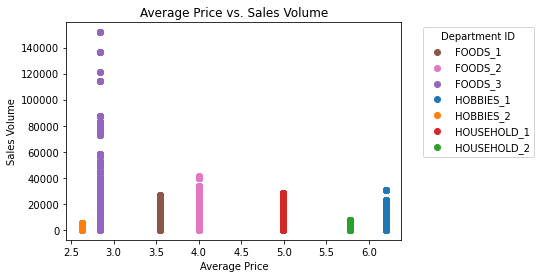

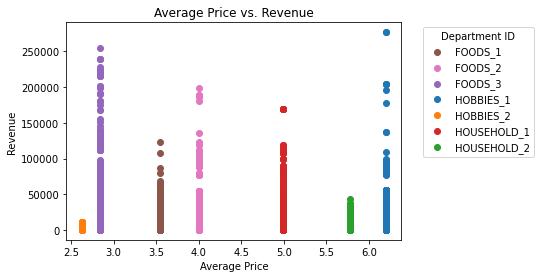

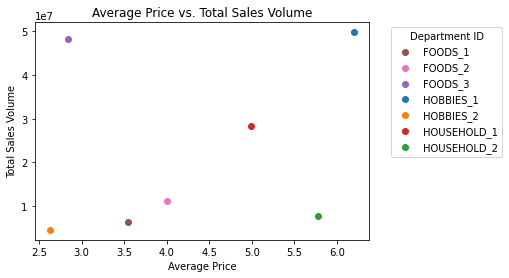

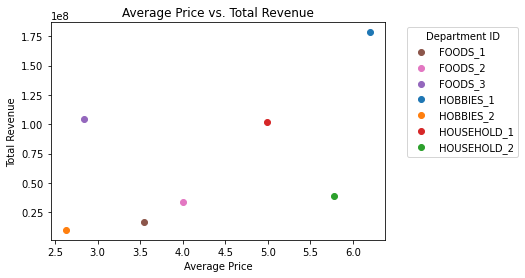

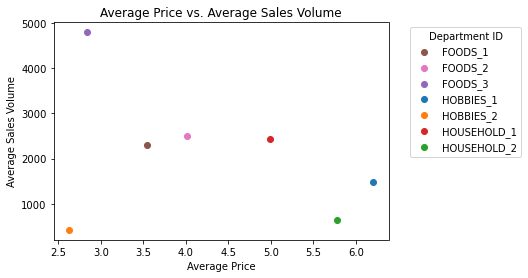

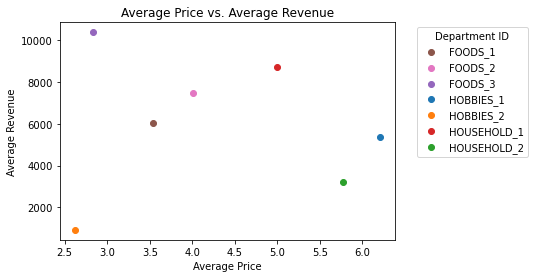

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define a list of colors for departments
colors = list(mcolors.TABLEAU_COLORS.keys())

# Map dept_id to colors
color_map = {dept_id: colors[i % len(colors)] for i, dept_id in enumerate(my_data['dept_id'].unique())}

my_data['avg_price'] = my_data.groupby('dept_id')['sell_price'].transform('mean')

# Average Price vs. Sales Volume
plt.figure()
for dept_id, group in my_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['sales_volume'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Revenue
plt.figure()
for dept_id, group in my_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['revenue'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Revenue")
plt.xlabel("Average Price")
plt.ylabel("Revenue")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Total Sales Volume
summary_data = my_data.groupby('dept_id').agg(total_sales_volume=('sales_volume', 'sum'),
                                              total_revenue=('revenue', 'sum'),
                                              avg_price=('sell_price', 'mean')).reset_index()
plt.figure()
for dept_id, group in summary_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['total_sales_volume'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Total Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Total Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Total Revenue
plt.figure()
for dept_id, group in summary_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['total_revenue'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Total Revenue")
plt.xlabel("Average Price")
plt.ylabel("Total Revenue")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Average Sales Volume
summary_data = my_data.groupby('dept_id').agg(avg_sales_volume=('sales_volume', 'mean'),
                                              avg_revenue=('revenue', 'mean'),
                                              avg_price=('sell_price', 'mean')).reset_index()
plt.figure()
for dept_id, group in summary_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['avg_sales_volume'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Average Sales Volume")
plt.xlabel("Average Price")
plt.ylabel("Average Sales Volume")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Price vs. Average Revenue
plt.figure()
for dept_id, group in summary_data.groupby('dept_id'):
    plt.scatter(group['avg_price'], group['avg_revenue'], label=dept_id, color=color_map[dept_id])
plt.title("Average Price vs. Average Revenue")
plt.xlabel("Average Price")
plt.ylabel("Average Revenue")
plt.legend(title='Department ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Price Elasticity Modelling

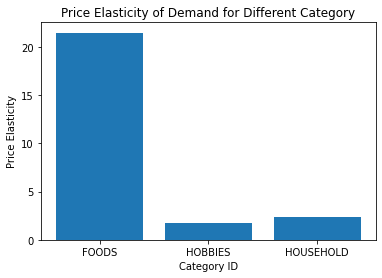

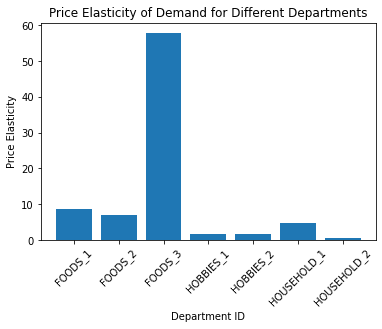

In [ ]:
# Price Elasticity of Demand for Different Category
my_data = my_data.sort_values('date').reset_index(drop=True)
my_data['quantity_change'] = my_data['sales_volume'] / my_data['sales_volume'].shift(1) - 1
my_data['price_change'] = my_data['sell_price'] / my_data['sell_price'].shift(1) - 1

price_elasticity_cat = my_data.groupby('cat_id').apply(lambda x: x['quantity_change'].sum() / x['price_change'].sum()).reset_index(name='price_elasticity')

plt.bar(price_elasticity_cat['cat_id'], price_elasticity_cat['price_elasticity'])
plt.title("Price Elasticity of Demand for Different Category")
plt.xlabel("Category ID")
plt.ylabel("Price Elasticity")
plt.show()

# Price Elasticity of Demand for Different Departments
price_elasticity_dept = my_data.groupby('dept_id').apply(lambda x: x['quantity_change'].sum() / x['price_change'].sum()).reset_index(name='price_elasticity')

plt.bar(price_elasticity_dept['dept_id'], price_elasticity_dept['price_elasticity'])
plt.title("Price Elasticity of Demand for Different Departments")
plt.xlabel("Department ID")
plt.ylabel("Price Elasticity")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming my_data is a pandas DataFrame
my_data = my_data.dropna(subset=['sell_price', 'quantity_change'])

X = my_data[['sell_price']]
y = my_data['quantity_change']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

price_coefficient = model.params['sell_price']

price_elasticity = price_coefficient * (my_data['sell_price'].mean() / my_data['quantity_change'].mean())

print(f"Price Elasticity of Demand: {price_elasticity}")


X = my_data[['sell_price']]
y = my_data['sales_volume']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

intercept = model.params['const']
slope = model.params['sell_price']

price_elasticity = slope * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print(f"Price Elasticity of Demand: {price_elasticity}")




                            OLS Regression Results                            
Dep. Variable:        quantity_change   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     857.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.73e-187
Time:                        19:00:26   Log-Likelihood:            -3.6140e+05
No. Observations:               85460   AIC:                         7.228e+05
Df Residuals:                   85458   BIC:                         7.228e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9782      0.089     55.661      0.0

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming my_data is a pandas DataFrame
my_data['quantity_sold'] = my_data['revenue'] / my_data['sell_price']

def calculate_price_elasticity(data):
    if len(data) < 2:
        return np.nan
    
    X = sm.add_constant(data['sell_price'])
    y = data['quantity_sold']
    model = sm.OLS(y, X).fit()
    
    price_coefficient = model.params['sell_price']
    price_elasticity = price_coefficient * (data['sell_price'].mean() / data['quantity_sold'].mean())
    return {'price_elasticity': price_elasticity, 'model': model}

price_elasticity = my_data.groupby('dept_id').apply(calculate_price_elasticity)

price_elasticity_df = pd.DataFrame({
    'dept_id': [x for x in price_elasticity.index],
    'price_elasticity': [x['price_elasticity'] for x in price_elasticity]
})

print(price_elasticity_df)





       dept_id  price_elasticity
0      FOODS_1         -0.615877
1      FOODS_2         -0.613937
2      FOODS_3         -0.563878
3    HOBBIES_1         -0.626619
4    HOBBIES_2         -0.334187
5  HOUSEHOLD_1         -0.565586
6  HOUSEHOLD_2         -0.492489


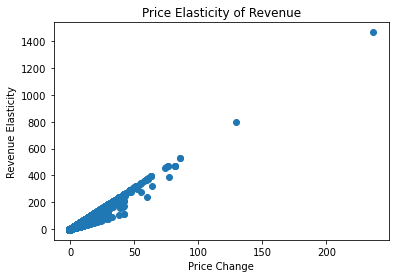

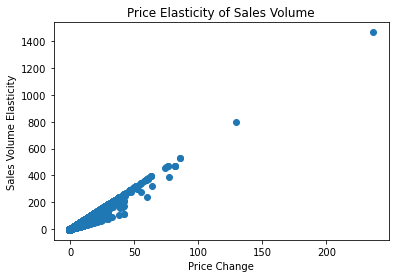

In [ ]:
my_data['revenue_elasticity'] = my_data['price_change'] * my_data['avg_price']

plt.figure()
plt.scatter(my_data['price_change'], my_data['revenue_elasticity'])
plt.xlabel("Price Change")
plt.ylabel("Revenue Elasticity")
plt.title("Price Elasticity of Revenue")
plt.show()

my_data['sales_volume_elasticity'] = my_data['price_change'] * my_data['avg_price']

plt.figure()
plt.scatter(my_data['price_change'], my_data['sales_volume_elasticity'])
plt.xlabel("Price Change")
plt.ylabel("Sales Volume Elasticity")
plt.title("Price Elasticity of Sales Volume")
plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sales_volume   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3151.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:00:27   Log-Likelihood:            -8.3581e+05
No. Observations:               85460   AIC:                         1.672e+06
Df Residuals:                   85458   BIC:                         1.672e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2826.9774     23.036    122.719      0.0

In [ ]:
# Fit a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 10  # degree of the polynomial
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Get the coefficients
coef = model.named_steps['linearregression'].coef_[1]

# Calculate price elasticity
price_elasticity = coef * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print("Price elasticity (polynomial regression):", price_elasticity)


Price elasticity (polynomial regression): -0.11270742219464347


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X = my_data[['sell_price']]
y = my_data['sales_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

# Predict quantity sold
y_pred = model.predict(X_test)

# Calculate price elasticity
price_elasticity = -model.feature_importances_[0] * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print("Price elasticity (Random Forest Regressor):", price_elasticity)


Price elasticity (Random Forest Regressor): -0.0026923252144726074


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Machine (GBM) model
model = GradientBoostingRegressor(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

# Predict quantity sold
y_pred = model.predict(X_test)

# Calculate price elasticity
price_elasticity = -model.feature_importances_[0] * (my_data['sell_price'].mean() / my_data['sales_volume'].mean())

print("Price elasticity (Gradient Boosting Machine):", price_elasticity)


Price elasticity (Gradient Boosting Machine): -0.0026923252144726074


Dynamic Pricing (Price Optimization)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Dictionary to store price elasticities for each product ID
elasticities_dict = {}


# Function to suggest price adjustments based on elasticities
def suggest_price_adjustment(elasticity):
    if elasticity < -1:
        return "Increase price"
    elif elasticity > -1 and elasticity < 0:
        return "Decrease price slightly"
    elif elasticity == 0:
        return "Maintain current price"
    elif elasticity > 0 and elasticity < 1:
        return "Decrease price"
    else:
        return "Increase price"

for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['sales_volume']
    
    model = LinearRegression()
    model.fit(X, y)
    elasticity = model.coef_[0] * (group['sell_price'].mean() / group['sales_volume'].mean())
    
    elasticities_dict[dept_id] = elasticity

# Create a DataFrame from the dictionary
result_df = pd.DataFrame({'dept_id': list(elasticities_dict.keys()), 'price_elasticity': list(elasticities_dict.values())})
result_df['suggested_adjustment'] = result_df['price_elasticity'].apply(suggest_price_adjustment)

print(result_df)


       dept_id  price_elasticity     suggested_adjustment
0      FOODS_1         -0.615877  Decrease price slightly
1      FOODS_2         -0.613937  Decrease price slightly
2      FOODS_3         -0.563878  Decrease price slightly
3    HOBBIES_1         -0.626619  Decrease price slightly
4    HOBBIES_2         -0.334187  Decrease price slightly
5  HOUSEHOLD_1         -0.565586  Decrease price slightly
6  HOUSEHOLD_2         -0.492489  Decrease price slightly


In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Dictionary to store price elasticities for each department
elasticities_dict = {}

for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['sales_volume']
    
    # Fit polynomial regression model
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Calculate price elasticity
    coef_linear = model.coef_[1]
    coef_squared = model.coef_[2]
    mean_price = group['sell_price'].mean()
    mean_sales_volume = group['sales_volume'].mean()
    elasticity = (coef_linear + 2 * coef_squared * mean_price / mean_sales_volume) * mean_price / mean_sales_volume
    
    elasticities_dict[dept_id] = elasticity

# Create a DataFrame from the dictionary
result_df = pd.DataFrame({'dept_id': list(elasticities_dict.keys()), 'price_elasticity': list(elasticities_dict.values())})
result_df['suggested_adjustment'] = result_df['price_elasticity'].apply(suggest_price_adjustment)

print(result_df)


       dept_id  price_elasticity     suggested_adjustment
0      FOODS_1         -2.397083           Increase price
1      FOODS_2         -2.817858           Increase price
2      FOODS_3         -1.381568           Increase price
3    HOBBIES_1         -1.811672           Increase price
4    HOBBIES_2         -0.685550  Decrease price slightly
5  HOUSEHOLD_1         -2.021165           Increase price
6  HOUSEHOLD_2         -0.904665  Decrease price slightly


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Dictionary to store price elasticities for each department
elasticities_dict = {}

for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['sales_volume']
    
    # Fit Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Calculate price elasticity
    elasticity = -model.feature_importances_[0] * (group['sell_price'].mean() / group['sales_volume'].mean())
    
    elasticities_dict[dept_id] = elasticity

# Create a DataFrame from the dictionary
result_df = pd.DataFrame({'dept_id': list(elasticities_dict.keys()), 'price_elasticity': list(elasticities_dict.values())})
result_df['suggested_adjustment'] = result_df['price_elasticity'].apply(suggest_price_adjustment)

print(result_df)


       dept_id  price_elasticity     suggested_adjustment
0      FOODS_1         -0.001547  Decrease price slightly
1      FOODS_2         -0.001605  Decrease price slightly
2      FOODS_3         -0.000592  Decrease price slightly
3    HOBBIES_1         -0.004157  Decrease price slightly
4    HOBBIES_2         -0.006210  Decrease price slightly
5  HOUSEHOLD_1         -0.002062  Decrease price slightly
6  HOUSEHOLD_2         -0.009095  Decrease price slightly


Dynamic Pricing (Polynomial Regression)

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Calculate price elasticities for each department using polynomial regression
elasticities_dict = {}
for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['quantity_sold']
    
    # Fit polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(X, y)
    
    # Calculate price elasticity
    elasticity = model.named_steps['linearregression'].coef_[1] * (group['sell_price'].mean() / group['quantity_sold'].mean())
    elasticities_dict[dept_id] = elasticity
    

# Function to calculate optimal price based on elasticity
def calculate_optimal_price(elasticity, current_price):
    if elasticity < -1:
        return current_price * 0.9  # Decrease price by 10%
    elif elasticity > -1 and elasticity < 0:
        return current_price * 0.95  # Decrease price by 5%
    elif elasticity == 0:
        return current_price  # Maintain current price
    elif elasticity > 0 and elasticity < 1:
        return current_price * 1.05  # Increase price by 5%
    else:
        return current_price * 1.1  # Increase price by 10%

# Apply dynamic pricing strategy for each department
my_data['elasticity'] = my_data['dept_id'].map(elasticities_dict)
my_data['optimal_price'] = my_data.apply(lambda x: calculate_optimal_price(x['elasticity'], x['sell_price']), axis=1)


In [ ]:
my_data_poly = my_data
my_data_poly.to_csv('dynamic_pricing_poly.csv', index=False)

Dynamic Pricing (Random Forest)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Calculate price elasticities for each department using Random Forest Regressor
elasticities_dict = {}
for dept_id, group in my_data.groupby('dept_id'):
    X = group[['sell_price']]
    y = group['quantity_sold']
    
    # Fit Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Calculate price elasticity
    elasticity = -model.feature_importances_[0] * (group['sell_price'].mean() / group['quantity_sold'].mean())
    elasticities_dict[dept_id] = elasticity

# Function to calculate optimal price based on elasticity
def calculate_optimal_price(elasticity, current_price, decrease_by=0.1, increase_by=0.1, maintain_price_range=(0.9, 1.1)):
    if elasticity < -1:
        return max(current_price * (1 - decrease_by), maintain_price_range[0])  # Decrease price by decrease_by
    elif elasticity > -1 and elasticity < 0:
        return max(current_price * (1 - decrease_by/2), maintain_price_range[0])  # Decrease price by decrease_by/2
    elif elasticity == 0:
        return current_price  # Maintain current price
    elif elasticity > 0 and elasticity < 1:
        return min(current_price * (1 + increase_by/2), maintain_price_range[1])  # Increase price by increase_by/2
    else:
        return min(current_price * (1 + increase_by), maintain_price_range[1])  # Increase price by increase_by


# Apply dynamic pricing strategy for each department
my_data['elasticity'] = my_data['dept_id'].map(elasticities_dict)
my_data['optimal_price'] = my_data.apply(lambda x: calculate_optimal_price(x['elasticity'], x['sell_price']), axis=1)

In [ ]:
my_data_rf = my_data
my_data_rf.to_csv('dynamic_pricing_rf.csv', index=False)

Prediciting Old Price vs New (Optimal) Price Sales Volume and Revenue

In [ ]:
dp_rf = pd.read_csv("dynamic_pricing_rf.csv")

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X = dp_rf[['sell_price', 'optimal_price']]
y = dp_rf['quantity_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict quantity sold at each optimal price
predicted_quantity_sold = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predicted_quantity_sold)
print(f"Mean Squared Error: {mse}")

# # Print the predicted quantity sold for each optimal price
# for i, pred in enumerate(predicted_quantity_sold):
#     print(f"Predicted quantity sold at old price {X_test.iloc[i, 0]} and optimal price {X_test.iloc[i, 1]}: {pred}")


Mean Squared Error: 14254726.056408457


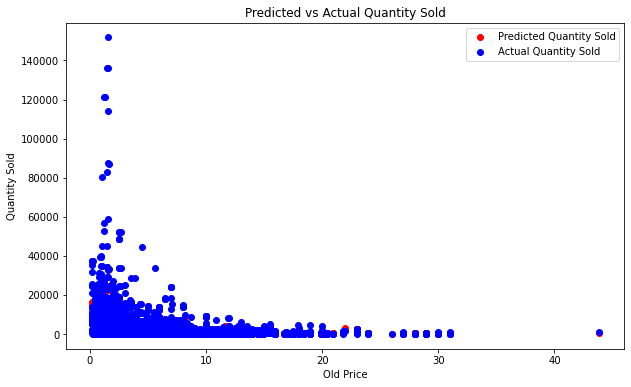

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted quantity sold for each old price and optimal price
plt.figure(figsize=(10, 6))
plt.scatter(X_test['sell_price'], predicted_quantity_sold, color='red', label='Predicted Quantity Sold')
plt.scatter(X_test['sell_price'], y_test, color='blue', label='Actual Quantity Sold')
plt.xlabel('Old Price')
plt.ylabel('Quantity Sold')
plt.title('Predicted vs Actual Quantity Sold')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Group the data by department
grouped = dp_rf.groupby('dept_id')

# Initialize lists to store all predicted quantities and actual quantities
all_predicted_quantity_sold = []
all_actual_quantity_sold = []

# Train a Random Forest model for each group
for name, group in grouped:
    X = group[['sell_price', 'optimal_price']]
    y = group['quantity_sold']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict quantity sold for the test data
    predicted_quantity_sold = model.predict(X_test)
    
    # Extend the lists with predicted and actual quantities for this department
    all_predicted_quantity_sold.extend(predicted_quantity_sold)
    all_actual_quantity_sold.extend(y_test)

# Calculate mean squared error
mse = mean_squared_error(all_actual_quantity_sold, all_predicted_quantity_sold)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 11188241.302494697


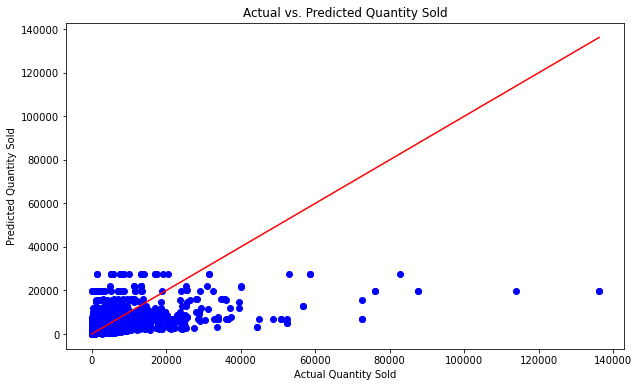

In [ ]:
# Plot the predicted quantity sold vs. actual quantity sold
plt.figure(figsize=(10, 6))
plt.scatter(all_actual_quantity_sold, all_predicted_quantity_sold, color='blue')
plt.plot([min(all_actual_quantity_sold), max(all_actual_quantity_sold)], [min(all_actual_quantity_sold), max(all_actual_quantity_sold)], color='red')
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold')
plt.show()

In [ ]:
# Initialize lists to store old price, optimal price, actual quantity sold, predicted quantity sold, and revenue
all_old_price = []
all_optimal_price = []
all_actual_quantity_sold = []
all_predicted_quantity_sold = []
all_revenue = []
all_actual_revenue = []

grouped = dp_rf.groupby('dept_id')

# Train a Random Forest model for each group
for name, group in grouped:
    X = group[['sell_price', 'optimal_price']]
    y = group['quantity_sold']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict quantity sold for the test data
    predicted_quantity_sold = model.predict(X_test)
    
    # Extend the lists with old price, optimal price, actual and predicted quantities for this department
    all_old_price.extend(X_test['sell_price'])
    all_optimal_price.extend(X_test['optimal_price'])
    all_actual_quantity_sold.extend(y_test)
    all_predicted_quantity_sold.extend(predicted_quantity_sold)

    # Calculate revenue based on predicted quantity sold and price
    revenue = predicted_quantity_sold * X_test['optimal_price']
    all_revenue.extend(revenue)

    # Calculate actual revenue based on actual quantity sold and price
    actual_revenue = y_test * X_test['sell_price']
    all_actual_revenue.extend(actual_revenue)

    # Print the old price, optimal price, actual and predicted quantities, and revenue for this department
    print(f"Department: {name}")
    print("Old Price\tOptimal Price\tActual Quantity Sold\tPredicted Quantity Sold\tActual Revenue\tPredicted Revenue")
    for i in range(len(X_test)):
        print(f"{X_test.iloc[i]['sell_price']}\t\t{X_test.iloc[i]['optimal_price']}\t\t{y_test.iloc[i]}\t\t\t{predicted_quantity_sold[i]}\t\t\t{actual_revenue.iloc[i]}\t\t\t{revenue.iloc[i]}")
    print("\n")

# Calculate mean squared error
mse = mean_squared_error(all_actual_quantity_sold, all_predicted_quantity_sold)
print(f"Mean Squared Error: {mse}")


NameError: name 'dp_rf' is not defined

In [ ]:
# Calculate total actual revenue for old price
total_actual_revenue_old_price = actual_revenue.sum()

# Calculate total predicted revenue for optimal price
total_predicted_revenue_optimal_price = revenue.sum()

# Print the total revenue for each pricing strategy
print(f"Total Actual Revenue (Old Price): {total_actual_revenue_old_price}")
print(f"Total Predicted Revenue (Optimal Price): {total_predicted_revenue_optimal_price}")

# Compare the total revenue
if total_predicted_revenue_optimal_price > total_actual_revenue_old_price:
    print("Using the optimal price generates more revenue.")
else:
    print("Using the old price generates more revenue.")


Total Actual Revenue (Old Price): 7727487.85
Total Predicted Revenue (Optimal Price): 7340933.886977554
Using the old price generates more revenue.


VISUALIZATION AND INTERPRETATION

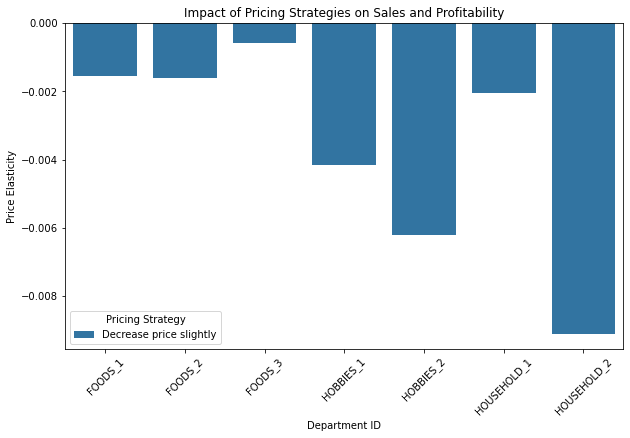

ValueError: Could not interpret value `sales_volume` for parameter `y`

<Figure size 720x432 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot showing the impact of different pricing strategies on sales and profitability
plt.figure(figsize=(10, 6))
sns.barplot(x='dept_id', y='price_elasticity', hue='suggested_adjustment', data=result_df)
plt.title('Impact of Pricing Strategies on Sales and Profitability')
plt.xlabel('Department ID')
plt.ylabel('Price Elasticity')
plt.xticks(rotation=45)
plt.legend(title='Pricing Strategy')
plt.show()

# Line plot showing the trend of sales and profitability with different pricing strategies
plt.figure(figsize=(10, 6))
sns.lineplot(x='dept_id', y='sales_volume', hue='suggested_adjustment', data=result_df)
plt.title('Trend of Sales Volume with Pricing Strategies')
plt.xlabel('Department ID')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.legend(title='Pricing Strategy')
plt.show()

# Scatter plot showing the relationship between price and sales/profitability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sell_price', y='sales_volume', data=my_data)
plt.title('Relationship between Price and Sales Volume')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.show()

# Heatmap showing the correlation between pricing strategies and sales/profitability
heatmap_data = result_df.pivot(index='dept_id', columns='suggested_adjustment', values='price_elasticity')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Correlation between Pricing Strategies and Price Elasticity')
plt.xlabel('Pricing Strategy')
plt.ylabel('Department ID')
plt.show()
